In [204]:
import warnings
warnings.filterwarnings('ignore')
import tweepy
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tukenya31/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# We then import the credentials
import twitter_credentials as tc

In [3]:
auth = tweepy.OAuthHandler(tc.api_key, tc.api_secret_key)

auth.set_access_token(tc.access_token, tc.access_token_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [5]:
search_words = "coronavirus OR corona OR vaccination OR dose OR covid OR sputnik OR pandemic OR covid19 OR covid19 vaccines OR coronavirusvaccines OR astrazenecacovidvaccine OR johnson&johnson’sVaccine OR pfizervaccine"

loc = "5.511081,22.603204,1800km"


my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [6]:
tweets = tweepy.Cursor(api.search,
                       q=my_search,
                       #lang="en",
                       tweet_mode='extended',
                       geocode=loc).items()

In [7]:
%%time

# ___Cell no. 25___

# Once again, this should take ~2 minutes to run if you are collecting 1000 tweets
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df_new

CPU times: user 1.14 s, sys: 81.7 ms, total: 1.22 s
Wall time: 1min 43s


,tweet_id_str,date_time,location,tweet_text
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","South Africa To Soon Administer Over 300,000 C..."
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,"#COVID19 : ""Les employés fédéraux devront êtr..."
2,1420872966682914817,2021-07-29 22:24:48,Lagos,How can you be offered monetary incentives to ...
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,Is there an African Union Vaccine Passport? Ar...
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,This is WHEN we'll know how well COVID-19 VACC...
...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"People dying of covid19 ,no vaccines, dying o..."
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",It has been established that Covid-19 vaccines...
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,Fox's mixed messages about vaccines are coming...
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",Pfizer Strikes Deal To Produce Vaccines In Afr...


In [8]:
#print(tweets[0])

In [79]:
for i,tweet in enumerate(df_new['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 south africa soon administer 300,000 19 vaccines per day 

2 #covid19 les employ f raux devront tre soit vaccin , soit masqu et test , le pr sident ricain joe #biden pris une rie de mesures pour doper la vaccination aux #usa 

3 offered monetary incentives take something supposed saving life? ? hidden agenda ! ! vaccines alter dna ! vaccines deadly ! 19 biden tells states offer 100 vaccine incentive cases rise 

4 african union vaccine passport ? plans ? coordinated response , testing , treatment vaccines , need take step forward vaccine authentication system 

5 ' know well 19 vaccines working ... 

6 19 risk blood clot high astrazeneca pfizer vaccines 

7 #covid19 scientists continue play lives. #israel giving third dose pfizer vaccine older residents #us follow suit ? 

8 would love see 1. federal government require vaccines federal workers 2. medical facilities nursing homes require vaccine 3. schools require vaccine staff eligible students fucking cry babies fucking rest us . 



In [80]:
# Data cleaning
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [81]:
# Apply the clean_text function to the 'tweet_text' column
df_new['tweet_text']=df_new['tweet_text'].apply(clean_text)

In [82]:
for i,tweet in enumerate(df_new['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 south africa soon administer 300,000 19 vaccines per day 

2 #covid19 les employ f raux devront tre soit vaccin , soit masqu et test , le pr sident ricain joe #biden pris une rie de mesures pour doper la vaccination aux #usa 

3 offered monetary incentives take something supposed saving life? ? hidden agenda ! ! vaccines alter dna ! vaccines deadly ! 19 biden tells states offer 100 vaccine incentive cases rise 

4 african union vaccine passport ? plans ? coordinated response , testing , treatment vaccines , need take step forward vaccine authentication system 

5 ' know well 19 vaccines working ... 

6 19 risk blood clot high astrazeneca pfizer vaccines 

7 #covid19 scientists continue play lives. #israel giving third dose pfizer vaccine older residents #us follow suit ? 

8 would love see 1. federal government require vaccines federal workers 2. medical facilities nursing homes require vaccine 3. schools require vaccine staff eligible students fucking cry babies fucking rest us . 



In [83]:
df_new['tweet_text']=df_new['tweet_text'].str.lower()
df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000,Neutral,1,1
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452,Positive,2,0
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732,Positive,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298,Negative,0,0
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106,Negative,0,2
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000,Neutral,1,1
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249,Negative,0,0


In [84]:
df_raw = df_new['tweet_text']
df_raw

0       south africa soon administer 300,000 19 vaccin...
1       #covid19 les employ f raux devront tre soit va...
2       offered monetary incentives take something sup...
3       african union vaccine passport ? plans ? coord...
4                     ' know well 19 vaccines working ...
                              ...                        
1122    people dying , vaccines , dying hunger food sp...
1123    established 19 vaccines uganda pure water. mus...
1124        fox ' mixed messages vaccines coming scrutiny
1125    pfizer strikes deal produce vaccines africa co...
1126    aceng despot museveni claim money vaccines wes...
Name: tweet_text, Length: 1127, dtype: object

In [15]:
df_new['location'].value_counts()

Kampala, Uganda                 130
Nairobi, Kenya                  128
Nigeria                          96
Lagos, Nigeria                   66
Uganda                           64
                               ... 
Mbale, Uganda                     1
Mukurweini & Karatina, Nyeri      1
North by Northwest                1
Ashanti, Ghana                    1
central africa                    1
Name: location, Length: 238, dtype: int64

In [16]:
stopwords = stopwords.words("english","french")

In [17]:
# Let's have a quick look at what words nltk considers to be stop words
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# Define our own list of stopwords
my_stopwords = ['coronavirus','covid','pandemic','covid19','lockdown','amp','via','virus'] 
# Extend the nltk stopwords list,
stopwords.extend(my_stopwords)

In [19]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [20]:
# Apply the stopword removal function to the text of all tweets
df_new['tweet_text']=df_new['tweet_text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df_new['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 south africa soon administer 300,000 19 vaccines per day 

2 #covid19 les employ f raux devront tre soit vaccin , soit masqu et test , le pr sident ricain joe #biden pris une rie de mesures pour doper la vaccination aux #usa 

3 offered monetary incentives take something supposed saving life? ? hidden agenda ! ! vaccines alter dna ! vaccines deadly ! 19 biden tells states offer 100 vaccine incentive cases rise 

4 african union vaccine passport ? plans ? coordinated response , testing , treatment vaccines , need take step forward vaccine authentication system 

5 ' know well 19 vaccines working ... 

6 19 risk blood clot high astrazeneca pfizer vaccines 

7 #covid19 scientists continue play lives. #israel giving third dose pfizer vaccine older residents #us follow suit ? 

8 would love see 1. federal government require vaccines federal workers 2. medical facilities nursing homes require vaccine 3. schools require vaccine staff eligible students fucking cry babies fucking rest us . 



In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tweet_id_str  1127 non-null   object        
 1   date_time     1127 non-null   datetime64[ns]
 2   location      1127 non-null   object        
 3   tweet_text    1127 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 35.3+ KB


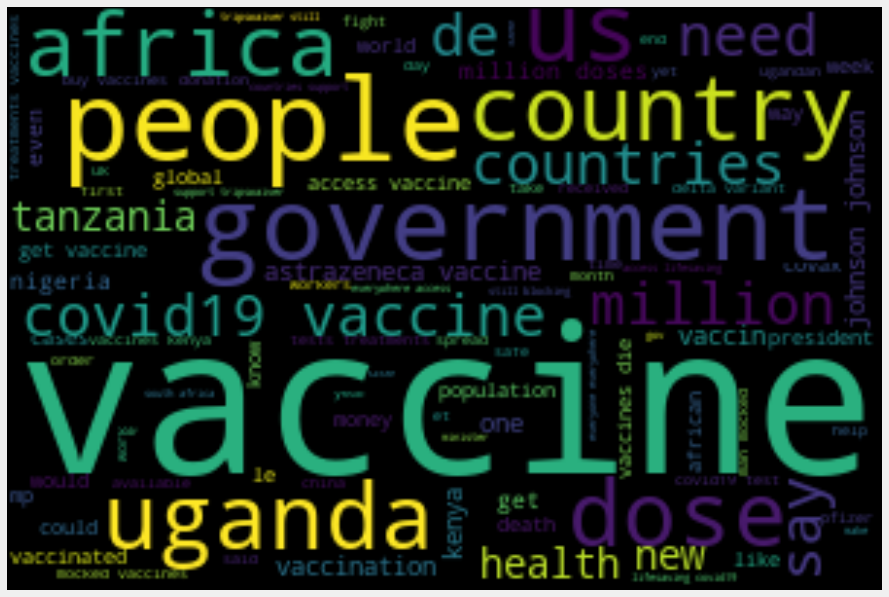

In [22]:
# Plot a word cloud

all_words = ' '.join( [data for data in df_new['tweet_text']])
word_cloud = WordCloud(width=300, height=200, random_state=21, max_font_size = 300,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis

In [23]:
import plotly.express as px
from plotly.offline import init_notebook_mode

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [24]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [25]:
df_new['subjectivity'] = df_new['tweet_text'].apply(getSubjectivity)
df_new['polarity'] = df_new['tweet_text'].apply(getPolarity)

df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000
...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000


In [26]:
def get_sentiment_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'    

In [27]:
df_new['TBsentiment'] = df_new['polarity'].apply(get_sentiment_label)
df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative


In [28]:
df_new['TBsentiment'].value_counts()

Neutral     562
Positive    388
Negative    177
Name: TBsentiment, dtype: int64

In [29]:
sorted_df = df_new.sort_values(by=['polarity'], ascending=False)

In [30]:

#Print out the text from the first 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df.head(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 excellent ! vaccine mandates post office workers ! #covid19 #vaccinated #vaccines #unions #union 

2 great news ! today #madagascar received 302,750 doses #covid19 j j vaccines donated #usa #covax facility. doses used extend vaccination coverage priority groups. 

3 fight 19 , journalists , ' done best investigate government done interms statistical data number vaccines infections. #endlockdownnow 

4 rising cases #covid19 , ideal know health status. visit us get #covid19test. remember , also offer range travel vaccines enhance safety. visit website details #amrefcareservices 

5 really great discussion regards 19 vaccines . 

6 #mindspark hon. gina m. raimondo , secretary commerce , u.s. department commerce. us happy support manufacturing vaccines africa africa. 

7 vaccines kenyans. received dose 19 vaccine yet , great news something look forward to. #kenyaukrelations leo 

8 great thread vaccines. 

9 gok mix matching 19 vaccines. prepare pfizer astrazeneca vaccine cocktail , depe

In [31]:
#Print out the text from the last 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df.tail(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 conservative tennessee based talk radio host changed previously skeptical messaging vaccines hospitalized 19 , family said. 

2 apart , else government done manage pandemic. hear stories , going procure vaccines , vulnerable people get relief funds , one day end , even quarter received. bulyomu agumye mune . 

3 continue defending wrong priorities ? pick trucks pressing issue 19 ? money used buy vaccines equip health facilities ? 

4 locked remedy rather hunger , unfortunately get vaccines every one us kos people voted seem care 

5 nfl trying create delicate environment keep 19 infections play games players must participate rules sit season fucking idiots lmfao ' taken vaccines lives 

6 sorry ur luck morons ! late us doctor says dying patients begging vaccine 

7 fucking yes. 

8 odm party leader raila odinga called uhuru kenyatta led government negotiate loans instrumental procuring vaccines , country desperate need of. #thisistheday 

9 people united stated america ' want vaccina

In [32]:
init_notebook_mode(connected=True)

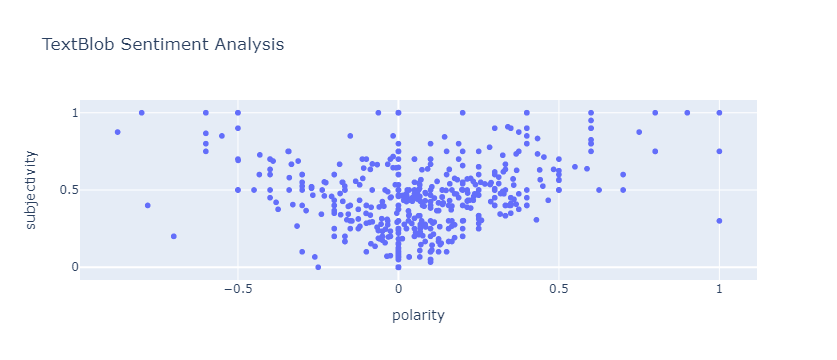

In [33]:
fig = px.scatter(df_new, x="polarity", y="subjectivity", hover_data=['tweet_text'],
                 title="TextBlob Sentiment Analysis")

fig.show()

In [34]:
analyser = SentimentIntensityAnalyzer()

In [35]:
def get_vaderCompoundPolarity(text):
    return analyser.polarity_scores(text)['compound']
    
df_new['vader_compound'] = df_new['tweet_text'].apply(get_vaderCompoundPolarity)
df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732
...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249


In [36]:
df_new['VADERsentiment'] = df_new['vader_compound'].apply(get_sentiment_label)
df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000,Neutral
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000,Neutral
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452,Positive
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000,Neutral
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732,Positive
...,...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298,Negative
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106,Negative
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000,Neutral
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249,Negative


In [37]:
sorted_df2 = df_new.sort_values(by=['vader_compound'], ascending=False)

In [38]:
for i, tweet in enumerate(sorted_df2.head(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 good evening colleagues , kindly inform 19 vaccines available county please let ' pass information loved ones eligible come 1st doses 2 nd doses respectively. thanks ' message general population 

2 sharing vaccines save lives lead world bringing end pandemic. sharing vaccines also serve another example strength 60 year partnership commitment tanzania. #pamoja60 

3 continued reports miracle cures solutions #covid19 need remind us seek professional health care. please remember #vaccines effective way build protection. #africacovidchampions #staysafeug 

4 certainly great news. approved vaccines available covax , people middle low income countries access vaccines 19. one safe , everyone safe. uga amb uganda 

5 gok mix matching 19 vaccines. prepare pfizer astrazeneca vaccine cocktail , depending availability donations. flip flopping award winning. mutahi kagwe team deserves award. flexibility , adaptability donor mgt skills legendary . 

6 protect 19 , get vaccinated ! 19 vaccines saf

In [39]:
for i, tweet in enumerate(sorted_df2.tail(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 whenever hear country destroyed 19 vaccines rethink , ' quite sure african country cannot caused notion vaccine hesitancy already suffer vaccine inadequacy either vaccine expire efficacy low. 

2 arrested ? self proclaimed bishop , josephat gwajima , related tanzania ' health minister dorothy gwajima mp ruling party , broken law causing public disorder havoc false statements #covid19 vaccines masks 

3 museveni completely refused use taxes correctly buy us vaccines. swear god used shilling 19 crisis management. donate , survive , ' , die ! even injected donated vaccines ! 

4 white people fear 19 , black people fear vaccines , wtf goin , totally two different worlds 

5 unfortunately ugly truth. serious all. roll vaccine yet completely ignore administering groups need most. roll vaccines ignore risks covid. make sense. 

6 argued , perhaps ignorance , c19 vaccines would stop infection , disease transmission processes dead tracks. always fantasy. 19 

7 people taken vaccines dying ? 6

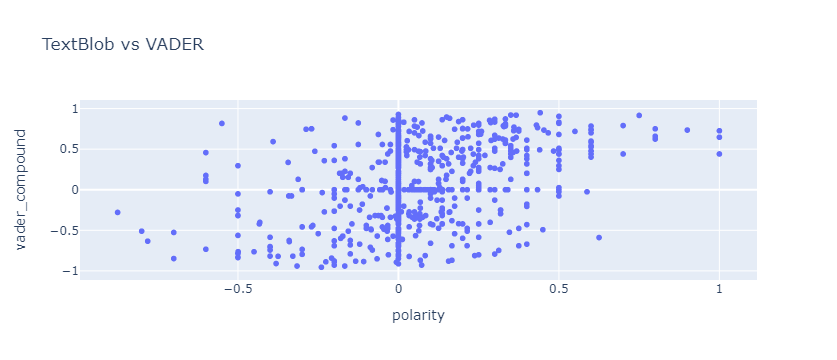

In [40]:
fig = px.scatter(df_new, x="polarity", y="vader_compound", hover_data=['tweet_text'],
                 title="TextBlob vs VADER")
fig.show()

In [41]:
df_new['Vader new']=''

In [42]:
for i in range(1127):
    if df_new['VADERsentiment'].loc[i] == 'Negative':
        df_new['Vader new'].loc[i]=0
    elif df_new['VADERsentiment'].loc[i] == 'Positive':
        df_new['Vader new'].loc[i]=2
    elif df_new['VADERsentiment'].loc[i] == 'Neutral':
        df_new['Vader new'].loc[i]=1
df_new

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000,Neutral,1
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000,Neutral,1
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452,Positive,2
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000,Neutral,1
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732,Positive,2
...,...,...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298,Negative,0
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106,Negative,0
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000,Neutral,1
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249,Negative,0


([<matplotlib.patches.Wedge at 0x7f20bd948828>,
 [Text(0.4456655476154211, 1.1141733346605667, 'Neutral'),
  Text(-1.156398731353415, -0.3205338891977149, 'Positive'),
  Text(0.7270811550579462, -0.9546480995422361, 'Negative')],
 [Text(0.25997156944232896, 0.6499344452186637, '37.9%'),
  Text(-0.6745659266228252, -0.18697810203200033, '32.8%'),
  Text(0.424130673783802, -0.5568780580663043, '29.3%')])

Text(0.5, 1.0, 'Vader Sentiment Analysis Chart')

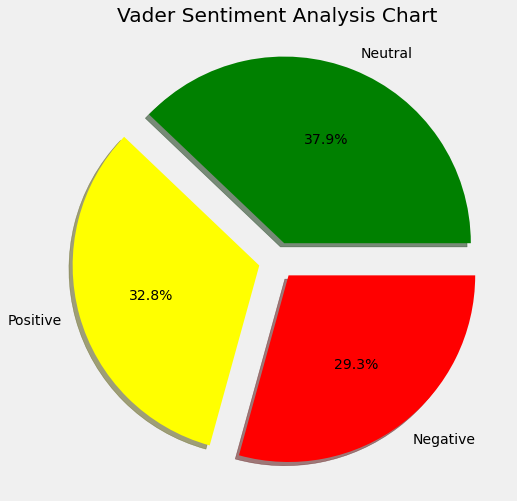

<Figure size 432x288 with 0 Axes>

In [218]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(df_new['VADERsentiment'].value_counts(),labels=['Neutral','Positive','Negative'],shadow=True,autopct='%1.1f%%', colors=my_colors,explode=my_explode)
my_colors=['green','yellow','red']
my_explode=(0.1,0.1,0.1)
plt.title('Vader Sentiment Analysis Chart')
plt.show()
plt.savefig('Vaderpiechart.png')

In [43]:
df_new['TB new']=''

In [44]:
for i in range(1127):
    if df_new['TBsentiment'].loc[i] == 'Negative':
        df_new['TB new'].loc[i]=0
    elif df_new['TBsentiment'].loc[i] == 'Positive':
        df_new['TB new'].loc[i]=2
    elif df_new['TBsentiment'].loc[i] == 'Neutral':
        df_new['TB new'].loc[i]=1

df_new.columns

Index(['tweet_id_str', 'date_time', 'location', 'tweet_text', 'subjectivity',
       'polarity', 'TBsentiment', 'vader_compound', 'VADERsentiment',
       'Vader new', 'TB new'],
      dtype='object')

In [94]:
df_new['TBsentiment'].value_counts()

Neutral     562
Positive    388
Negative    177
Name: TBsentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f20bda00630>,
 [Text(0.005017630543770852, 1.1999895096973665, 'Neutral'),
  Text(-0.5727620042486845, -1.0544874046137442, 'Positive'),
  Text(1.0568731098094377, -0.5683478070352066, 'Negative')],
 [Text(0.0029269511505329968, 0.6999938806567971, '49.9%'),
  Text(-0.3341111691450659, -0.6151176526913507, '34.4%'),
  Text(0.6165093140555054, -0.3315362207705371, '15.7%')])

Text(0.5, 1.0, 'Textblob Sentiment Analysis Chart')

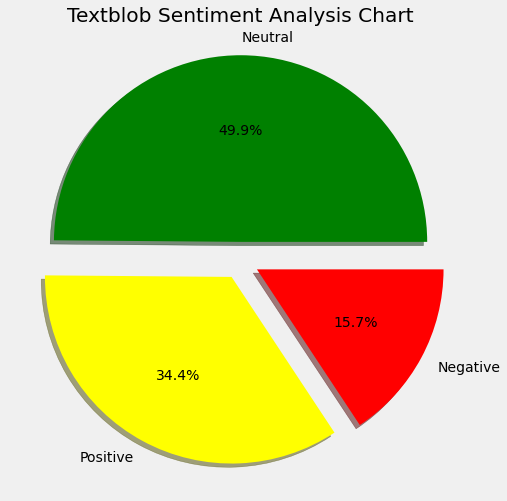

<Figure size 432x288 with 0 Axes>

In [216]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(df_new['TBsentiment'].value_counts(),labels=['Neutral','Positive','Negative'],shadow=True,autopct='%1.1f%%', colors=my_colors,explode=my_explode)
my_colors=['green','yellow','red']
my_explode=(0.1,0.1,0.1)
plt.title('Textblob Sentiment Analysis Chart')
plt.show()
plt.savefig('TBpiechart.png')

# Sentiment Analysis Using Machine Learning

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report 

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id_str    1127 non-null   object        
 1   date_time       1127 non-null   datetime64[ns]
 2   location        1127 non-null   object        
 3   tweet_text      1127 non-null   object        
 4   subjectivity    1127 non-null   float64       
 5   polarity        1127 non-null   float64       
 6   TBsentiment     1127 non-null   object        
 7   vader_compound  1127 non-null   float64       
 8   VADERsentiment  1127 non-null   object        
 9   Vader new       1127 non-null   object        
 10  TB new          1127 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 97.0+ KB


In [47]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
from simpletransformers.classification import ClassificationModel

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import random
import numpy as np
import torch
from sklearn.model_selection import KFold

import logging
from pathlib import Path

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [49]:
df2 = pd.read_csv('labelled_data_cleaned.csv')
df2

,tweet_text,label
0,Jesus Ive actually spent all the money I saved...,1
1,Coronavirus and throat cancer looking after yo...,1
2,Me sick at home in Houston w Covid symptoms ri...,1
3,Coronavirus pandemic prompts record drop in gl...,1
4,Coronavirus How can we make postpandemic citie...,1
...,...,...
4224,Was recently tested for #coronavirus not at al...,1
4225,"Despite the Lockdown, Crises, Vera Lynn We'll ...",1
4226,"Due to COVID and mandatory face masks, million...",0
4227,Something someone said to me in regards to me ...,0


In [50]:
bi_df = df2[(df2.label==0) | (df2.label==2) ] # make it binary classification
bi_df.label.replace(2,1, inplace=True) # make it binary classification

pos_samples = bi_df[bi_df['label']==1]
neg_samples = bi_df[bi_df['label']==0].sample(len(pos_samples), random_state=42)

bal_bi_df = pd.concat([pos_samples, neg_samples])

bi_df['label'].value_counts()
bal_bi_df['label'].value_counts()

0    1527
1     747
Name: label, dtype: int64

1    747
0    747
Name: label, dtype: int64

In [51]:
train_df, val_df = train_test_split(bi_df, test_size=0.2,  random_state=42)

In [52]:
train_df['label'].value_counts()
val_df['label'].value_counts()

0    1213
1     606
Name: label, dtype: int64

0    314
1    141
Name: label, dtype: int64

In [53]:
# Build the model

bert_model = ClassificationModel('bert',
                            'bert-base-cased',
                            num_labels=2,
                            use_cuda=False,
                            args={'overwrite_output_dir': True})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [54]:
# Train the model 
bert_model.train_model(train_df=train_df, eval_df=val_df)

In [55]:
def multi_F1(y_true, y_pred, average='macro'):
    return sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, average=average)

def multi_classification_report(y_true, y_pred):
    return sklearn.metrics.classification_report(y_true=y_true, y_pred=y_pred)

In [56]:
%%time

# ___Cell no. 33___

# Calculated and print out the f1 score

result, model_outputs, wrong_predictions = bert_model.eval_model(val_df, f1=multi_F1);
print('f1 score = ',result['f1'])


f1 score =  0.8733591216081886
CPU times: user 3min 50s, sys: 1.1 s, total: 3min 51s
Wall time: 16.1 s


In [57]:
%%time

# ___Cell no. 34___

# Calculated and print out the results in the classification report

result, model_outputs, wrong_predictions = bert_model.eval_model(val_df, report=multi_classification_report);
print('Classification Report: ', result['report'])


Classification Report:                precision    recall  f1-score   support

           0       0.92      0.93      0.92       314
           1       0.83      0.82      0.82       141

    accuracy                           0.89       455
   macro avg       0.88      0.87      0.87       455
weighted avg       0.89      0.89      0.89       455

CPU times: user 3min 52s, sys: 1.06 s, total: 3min 53s
Wall time: 16.2 s


In [58]:
new_tweets = df_new['tweet_text'].iloc[10:30].values

In [59]:
new_result = bert_model.predict(new_tweets)
print(new_result[0])


[0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0]


In [60]:
#new_tweet = df_new['tweet_text']

In [61]:
new_result = bert_model.predict(df_raw)
print(new_result[0])


[1 1 0 ... 1 0 0]


In [62]:
type(new_result)

tuple

In [63]:
type(list(new_result))

list

In [64]:
df_pred = pd.DataFrame(new_result)
df_pred

,0,1,2,3,4,5,6,7,8,9,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126
0,1,1,0,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,"[-0.45890272, 0.93046474]","[0.048409887, 0.19223812]","[1.3707823, -1.6308376]","[-1.070445, 1.5660219]","[-0.5543187, 0.8455918]","[0.9395517, -1.2487681]","[-0.23896135, 0.5788179]","[1.507424, -1.7292178]","[0.5142374, -0.13686582]","[-0.8376337, 1.3002603]",...,"[-0.9234044, 1.2061287]","[0.15538692, 0.093350485]","[1.46325, -1.771764]","[1.5143659, -1.7694873]","[1.4058526, -1.6780447]","[1.4810457, -1.7829574]","[1.445054, -1.6119801]","[0.15678889, 0.24881719]","[1.1493528, -1.5550218]","[1.4683392, -1.7721317]"


In [65]:
df_pred2 = df_pred.transpose()

In [66]:
df_pred2

,0,1
0,1,"[-0.45890272, 0.93046474]"
1,1,"[0.048409887, 0.19223812]"
2,0,"[1.3707823, -1.6308376]"
3,1,"[-1.070445, 1.5660219]"
4,1,"[-0.5543187, 0.8455918]"
...,...,...
1122,0,"[1.4810457, -1.7829574]"
1123,0,"[1.445054, -1.6119801]"
1124,1,"[0.15678889, 0.24881719]"
1125,0,"[1.1493528, -1.5550218]"


In [67]:
df_pred3 = df_pred2[0]
df_pred3

0       1
1       1
2       0
3       1
4       1
       ..
1122    0
1123    0
1124    1
1125    0
1126    0
Name: 0, Length: 1127, dtype: object

In [68]:
final_df = pd.concat([df_new, df_pred3], axis=1)
final_df

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,0
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452,Positive,2,0,0
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732,Positive,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298,Negative,0,0,0
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106,Negative,0,2,0
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000,Neutral,1,1,1
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249,Negative,0,0,0


In [87]:

final_df=final_df.rename(columns={0:'Bert Pred'})
final_df

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.287760,Negative,0.7452,Positive,2,0,0
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.000000,Neutral,0.2732,Positive,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1417926848353345538,2021-07-21 19:17:59,planet earth,"people dying , vaccines , dying hunger food sp...",0.600000,-0.200000,Negative,-0.6298,Negative,0,0,0
1123,1417924096675962889,2021-07-21 19:07:03,"Nairobi, Kenya",established 19 vaccines uganda pure water. mus...,0.500000,0.214286,Positive,-0.5106,Negative,0,2,0
1124,1417923719855435778,2021-07-21 19:05:33,Nigeria,fox ' mixed messages vaccines coming scrutiny,0.250000,0.000000,Neutral,0.0000,Neutral,1,1,1
1125,1417923130807443456,2021-07-21 19:03:12,"Nairobi, Kenya",pfizer strikes deal produce vaccines africa co...,0.850000,-0.150000,Negative,-0.6249,Negative,0,0,0


In [242]:
df_raw[2]

'offered monetary incentives take something supposed saving life? ? hidden agenda ! ! vaccines alter dna ! vaccines deadly ! 19 biden tells states offer 100 vaccine incentive cases rise'

In [169]:
final_df.dtypes

tweet_id_str              object
date_time         datetime64[ns]
location                  object
tweet_text                object
subjectivity             float64
polarity                 float64
TBsentiment               object
vader_compound           float64
VADERsentiment            object
Vader new                 object
TB new                    object
Bert Pred                 object
dtype: object

In [186]:
final_df['day']= pd.DatetimeIndex(final_df['date_time']).day
#final_df['Month']= final_df['Month'].astype('int32')
final_df.head()

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.000000,0.00000,Neutral,0.0000,Neutral,1,1,1,7,29
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.000000,0.00000,Neutral,0.0000,Neutral,1,1,1,7,29
2,1420872966682914817,2021-07-29 22:24:48,Lagos,offered monetary incentives take something sup...,0.366667,-0.28776,Negative,0.7452,Positive,2,0,0,7,29
3,1420869726591455236,2021-07-29 22:11:55,Abuja.,african union vaccine passport ? plans ? coord...,0.000000,0.00000,Neutral,0.0000,Neutral,1,1,1,7,29
4,1420866487191957506,2021-07-29 21:59:03,The Great Pacific Northwest,' know well 19 vaccines working ...,0.000000,0.00000,Neutral,0.2732,Positive,2,1,1,7,29


In [86]:
del final_df['Bert Predicted']


KeyError: 'Bert Predicted'

In [187]:
final_df.head(2)

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.0,0.0,Neutral,0.0,Neutral,1,1,1,7,29
1,1420873656931168266,2021-07-29 22:27:33,Kinshasa,#covid19 les employ f raux devront tre soit va...,0.0,0.0,Neutral,0.0,Neutral,1,1,1,7,29


In [188]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id_str    1127 non-null   object        
 1   date_time       1127 non-null   datetime64[ns]
 2   location        1127 non-null   object        
 3   tweet_text      1127 non-null   object        
 4   subjectivity    1127 non-null   float64       
 5   polarity        1127 non-null   float64       
 6   TBsentiment     1127 non-null   object        
 7   vader_compound  1127 non-null   float64       
 8   VADERsentiment  1127 non-null   object        
 9   Vader new       1127 non-null   object        
 10  TB new          1127 non-null   object        
 11  Bert Pred       1127 non-null   object        
 12  month           1127 non-null   int64         
 13  day             1127 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
me

In [189]:
lagos_df = final_df[final_df['location']=='Lagos, Nigeria']
nigeria_df = final_df[final_df['location']=='Nigeria']
nigerian_df = pd.concat([lagos_df, nigeria_df], axis=0)
nigerian_df.head(2)

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.0,0.0,Neutral,0.0,Neutral,1,1,1,7,29
20,1420804717995769862,2021-07-29 17:53:36,"Lagos, Nigeria","nsia invest n100 billion 19 vaccines , others ...",0.0,0.0,Neutral,0.0,Neutral,1,1,0,7,29


<AxesSubplot:ylabel='TBsentiment'>

Text(0.5, 1.0, 'TBSentiment Distribution among Nigerian Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

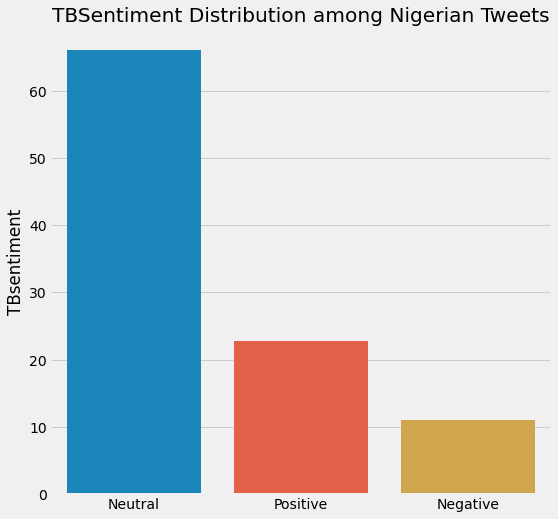

In [253]:
fig, ax=plt.subplots(figsize=(8,8))
counts=nigerian_df['TBsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('TBSentiment Distribution among Nigerian Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()

<AxesSubplot:ylabel='VADERsentiment'>

Text(0.5, 1.0, 'VaderSentiment Distribution among Nigerian Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

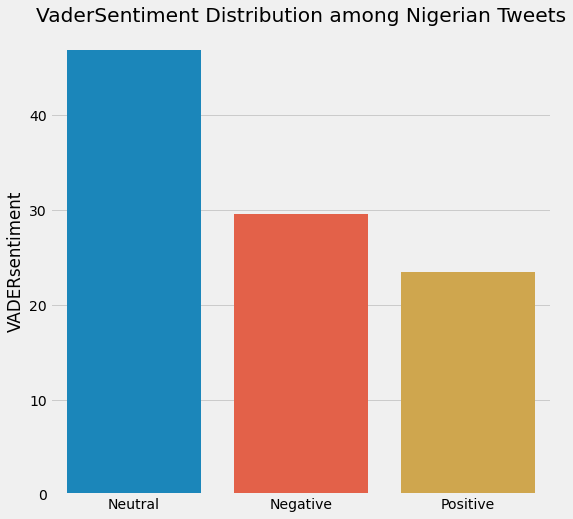

In [252]:
fig, ax=plt.subplots(figsize=(8,8))
counts=nigerian_df['VADERsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('VaderSentiment Distribution among Nigerian Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()

#nigerian_df['VADERsentiment'].value_counts().plot(kind='barh')
#plt.title('Sentiment Distribution among Nigerian Tweets')

In [191]:
nigerian_df.head(2)

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.0,0.0,Neutral,0.0,Neutral,1,1,1,7,29
20,1420804717995769862,2021-07-29 17:53:36,"Lagos, Nigeria","nsia invest n100 billion 19 vaccines , others ...",0.0,0.0,Neutral,0.0,Neutral,1,1,0,7,29


In [192]:
nigerian_df['time'] = nigerian_df['date_time'].dt.time
nigerian_df['hour'] = nigerian_df['date_time'].dt.hour
nigerian_df.head(2)

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day,time,hour
0,1420889397684178946,2021-07-29 23:30:05,"Lagos, Nigeria","south africa soon administer 300,000 19 vaccin...",0.0,0.0,Neutral,0.0,Neutral,1,1,1,7,29,23:30:05,23
20,1420804717995769862,2021-07-29 17:53:36,"Lagos, Nigeria","nsia invest n100 billion 19 vaccines , others ...",0.0,0.0,Neutral,0.0,Neutral,1,1,0,7,29,17:53:36,17


In [247]:
kampala_df = final_df[final_df['location']=='Kampala, Uganda']
uganda_df = final_df[final_df['location']=='Uganda']
uganda_df = pd.concat([kampala_df, uganda_df], axis=0)
uganda_df

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
21,1420790402903388160,2021-07-29 16:56:43,"Kampala, Uganda",#africa ' access vaccines still drastically lo...,0.314583,-0.052083,Negative,0.1137,Positive,2,0,0,7,29
22,1420788603244908545,2021-07-29 16:49:34,"Kampala, Uganda",although four billion doses anti vaccines admi...,0.616667,0.300000,Positive,-0.1280,Negative,0,2,0,7,29
38,1420768582011547651,2021-07-29 15:30:01,"Kampala, Uganda",bidco uganda limited boosted drive secure 19 v...,0.371429,0.164286,Positive,0.4588,Positive,2,2,1,7,29
52,1420738393512857601,2021-07-29 13:30:03,"Kampala, Uganda","vaccines become household conversation , talk ...",0.850000,0.400000,Positive,0.3818,Positive,2,2,0,7,29
64,1420715933262393347,2021-07-29 12:00:48,"Kampala, Uganda","thank donors. however , planning vaccinate 45 ...",0.462500,0.000000,Neutral,-0.1431,Negative,0,1,0,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1418416057140883463,2021-07-23 03:41:55,Uganda,global white supremacy manifests vaccine acces...,0.100000,0.125000,Positive,-0.4753,Negative,0,2,0,7,23
1050,1418143323391467520,2021-07-22 09:38:10,Uganda,psfu asks members donate 19 vaccines #chimprep...,0.000000,0.000000,Neutral,0.0000,Neutral,1,1,1,7,22
1084,1418106562799968257,2021-07-22 07:12:06,Uganda,authorized 19 vaccines help protect 19. #yourn...,0.000000,0.000000,Neutral,0.6486,Positive,2,1,1,7,22
1093,1418071700235816960,2021-07-22 04:53:34,Uganda,. hoima district 19 positivity ratio dropped 2...,0.000000,0.000000,Neutral,0.6442,Positive,2,1,0,7,22


<AxesSubplot:ylabel='TBsentiment'>

Text(0.5, 1.0, 'TBSentiment Distribution among Ugandan Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

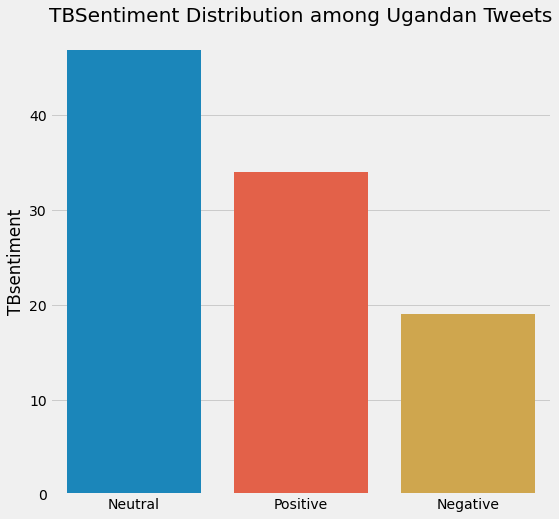

In [251]:
fig, ax=plt.subplots(figsize=(8,8))
counts=uganda_df['TBsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('TBSentiment Distribution among Ugandan Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()


<AxesSubplot:ylabel='VADERsentiment'>

Text(0.5, 1.0, 'VaderSentiment Distribution among Ugandan Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

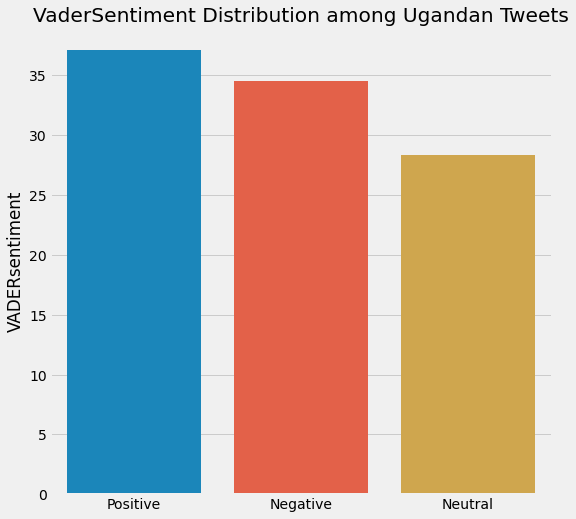

In [250]:
fig, ax=plt.subplots(figsize=(8,8))
counts=uganda_df['VADERsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('VaderSentiment Distribution among Ugandan Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()


#uganda_df['VADERsentiment'].value_counts().plot(kind='barh')

#plt.title('Sentiment Distribution among Ugandan Tweets')

In [198]:
nairobi_df = final_df[final_df['location']=='Nairobi, Kenya']
kenya_df = final_df[final_df['location']=='Kenya']
kenya_df = pd.concat([nairobi_df, kenya_df], axis=0)
kenya_df

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day
12,1420827121803464722,2021-07-29 19:22:38,"Nairobi, Kenya",people like even understand pain people lost l...,0.450000,0.350000,Positive,0.3987,Positive,2,2,0,7,29
15,1420815217370484741,2021-07-29 18:35:19,"Nairobi, Kenya",19 surge worries would want us think vaccines ...,0.428571,0.214286,Positive,-0.4767,Negative,0,2,0,7,29
16,1420807951200268288,2021-07-29 18:06:27,"Nairobi, Kenya",' funny seeing westerners say vaccines authori...,0.666667,-0.183333,Negative,0.2023,Positive,2,0,0,7,29
30,1420780741881909250,2021-07-29 16:18:20,"Nairobi, Kenya","according u.k government , 817,000 vaccines bo...",0.000000,0.000000,Neutral,0.4019,Positive,2,1,1,7,29
43,1420752701709713413,2021-07-29 14:26:55,"Nairobi, Kenya",burundi finally changing notion towards vaccin...,1.000000,0.000000,Neutral,0.3182,Positive,2,1,1,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1418539796750905347,2021-07-23 11:53:37,Kenya,"like , would like channel future sing #maskoff...",0.500000,-0.041667,Negative,0.1027,Positive,2,0,0,7,23
971,1418268726667919360,2021-07-22 17:56:29,Kenya,"10bn bbi nothing vaccines , ' every rude",0.600000,-0.300000,Negative,-0.4588,Negative,0,0,0,7,22
1019,1418197384920715266,2021-07-22 13:13:00,Kenya,new vaccination figures underscore urgency rea...,0.477273,-0.181818,Negative,-0.2023,Negative,0,0,1,7,22
1053,1418142775271432194,2021-07-22 09:36:00,Kenya,african countries larger developing world stil...,0.275000,-0.033333,Negative,-0.4404,Negative,0,0,0,7,22


<AxesSubplot:ylabel='TBsentiment'>

Text(0.5, 1.0, 'TBSentiment Distribution among Kenyan Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

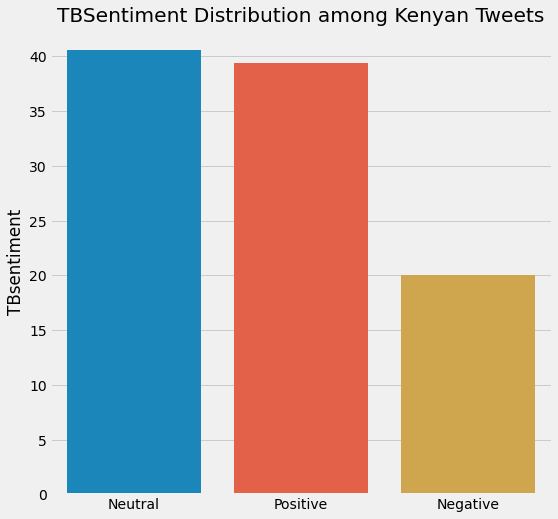

In [254]:
fig, ax=plt.subplots(figsize=(8,8))
counts=kenya_df['TBsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('TBSentiment Distribution among Kenyan Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()


<AxesSubplot:ylabel='VADERsentiment'>

Text(0.5, 1.0, 'VaderSentiment Distribution among Kenyan Tweets')

AttributeError: 'AxesSubplot' object has no attribute 'set_xtricklabels'

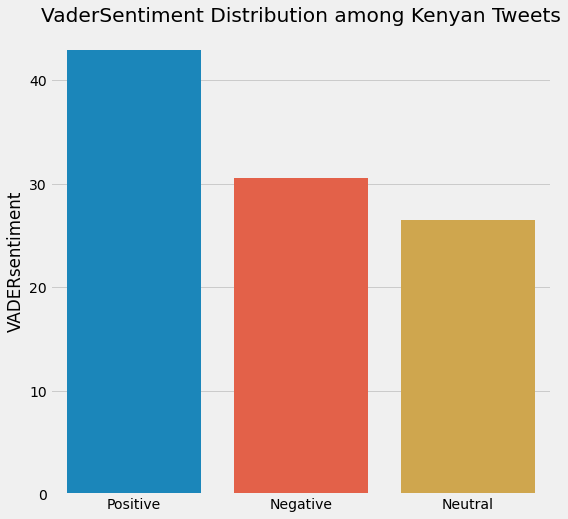

In [255]:
fig, ax=plt.subplots(figsize=(8,8))
counts=kenya_df['VADERsentiment'].value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.title('VaderSentiment Distribution among Kenyan Tweets')
ax.set_xtricklabels('Positive','Negative','Neutral')
ax.set_ylabel('percentage')
plt.show()

#kenya_df['VADERsentiment'].value_counts().plot(kind='barh')
#plt.title('Sentiment Distribution among Kenyan Tweets')

In [200]:
kenya_df['time'] = kenya_df['date_time'].dt.time
kenya_df['hour'] = kenya_df['date_time'].dt.hour
kenya_df.head(2)

,tweet_id_str,date_time,location,tweet_text,subjectivity,polarity,TBsentiment,vader_compound,VADERsentiment,Vader new,TB new,Bert Pred,month,day,time,hour
12,1420827121803464722,2021-07-29 19:22:38,"Nairobi, Kenya",people like even understand pain people lost l...,0.450000,0.350000,Positive,0.3987,Positive,2,2,0,7,29,19:22:38,19
15,1420815217370484741,2021-07-29 18:35:19,"Nairobi, Kenya",19 surge worries would want us think vaccines ...,0.428571,0.214286,Positive,-0.4767,Negative,0,2,0,7,29,18:35:19,18


In [117]:
final_df['Bert Pred'].value_counts()

0    606
1    521
Name: Bert Pred, dtype: int64

([<matplotlib.patches.Wedge at 0x7f20bd369198>,
 [Text(-0.1300142788279901, 1.0922894704705515, 'Negative'),
  Text(0.13001427882799044, -1.0922894704705515, 'Positive')],
 [Text(-0.07091687936072186, 0.5957942566203007, '53.8%'),
  Text(0.07091687936072205, -0.5957942566203007, '46.2%')])

Text(0.5, 1.0, 'BERT Sentiment Analysis Chart')

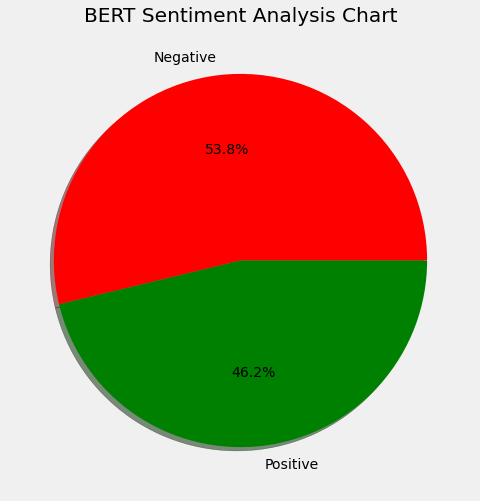

<Figure size 432x288 with 0 Axes>

In [239]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(final_df['Bert Pred'].value_counts(),labels=['Negative','Positive'],shadow=True,autopct='%1.1f%%', colors=my_colors)
plt.title('BERT Sentiment Analysis Chart')
my_colors=['red','green']
plt.show()
plt.savefig('Bertpiechart.png')

([<matplotlib.patches.Wedge at 0x7f20bcfe14e0>,
 [Text(-0.06095272160943036, 1.098309958858793, 'Negative'),
  Text(0.06095282444063009, -1.0983099531519824, 'Positive')],
 [Text(-0.033246939059689284, 0.5990781593775234, '51.8%'),
  Text(0.03324699514943459, -0.5990781562647176, '48.2%')])

Text(0.5, 1.0, 'BERT Analysis For Kenya')

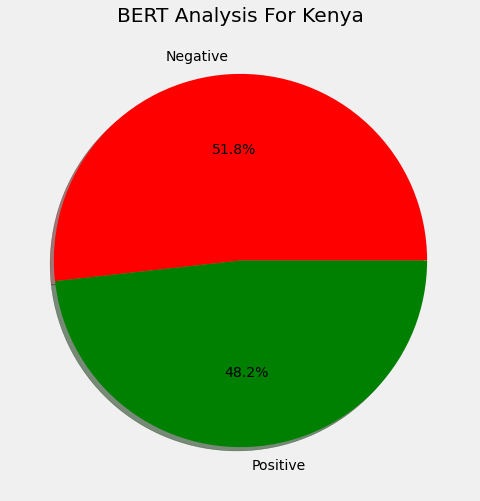

<Figure size 432x288 with 0 Axes>

In [257]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(kenya_df['Bert Pred'].value_counts(),labels=['Negative','Positive'],shadow=True,autopct='%1.1f%%', colors=my_colors)
plt.title('BERT Analysis For Kenya')
my_colors=['red','green']
plt.show()
plt.savefig('Bertpiechart.png')

([<matplotlib.patches.Wedge at 0x7f20bcfae828>,
 [Text(-0.1597513359268985, 1.0883379579292323, 'Negative'),
  Text(0.15975123402934413, -1.088337972886227, 'Positive')],
 [Text(-0.08713709232376281, 0.5936388861432176, '54.6%'),
  Text(0.0871370367432786, -0.5936388943015783, '45.4%')])

Text(0.5, 1.0, 'BERT Analysis For Uganda')

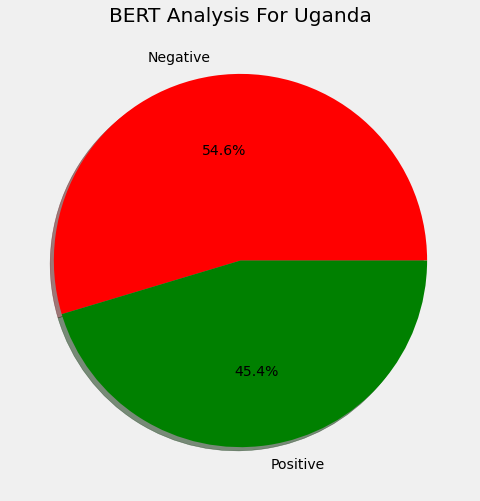

<Figure size 432x288 with 0 Axes>

In [258]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(uganda_df['Bert Pred'].value_counts(),labels=['Negative','Positive'],shadow=True,autopct='%1.1f%%', colors=my_colors)
plt.title('BERT Analysis For Uganda')
my_colors=['red','green']
plt.show()
plt.savefig('Bertpiechart.png')

([<matplotlib.patches.Wedge at 0x7f20bcf7ba90>,
 [Text(-0.29498990098453376, 1.059707958976026, 'Negative'),
  Text(0.29498990098453315, -1.0597079589760263, 'Positive')],
 [Text(-0.16090358235520022, 0.5780225230778324, '58.6%'),
  Text(0.1609035823551999, -0.5780225230778324, '41.4%')])

Text(0.5, 1.0, 'BERT Analysis For Nigeria')

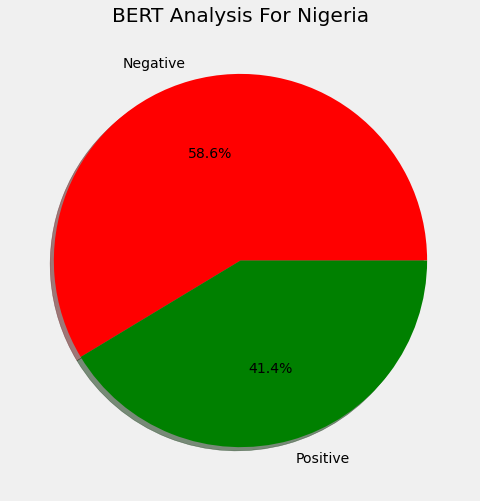

<Figure size 432x288 with 0 Axes>

In [259]:
fig, ax=plt.subplots(figsize=(8,8))
plt.pie(nigerian_df['Bert Pred'].value_counts(),labels=['Negative','Positive'],shadow=True,autopct='%1.1f%%', colors=my_colors)
plt.title('BERT Analysis For Nigeria')
my_colors=['red','green']
plt.show()
plt.savefig('Bertpiechart.png')